In [4]:
import sys; sys.path.insert(0, '/home/j/jwoo/my_python/lib/python3.11/site-packages/')
import cellhint

/package/python-cbrg/current/3.11.3/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/package/python-cbrg/current/3.11.3/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/package/python-cbrg/current/3.11.3/lib/python3.11/site-packages/uma

In [3]:
import scanpy as sc

In [5]:
adata = sc.read('/ceph/project/holab/jwoo/IPF_HT/Integration/Adam_Haberman_Reyfman_HO_Integration/Adams_Haberman_Reyfman_HO_Morse_Integration/CommonGenes/merged_2.h5ad')
adata

/package/python-cbrg/current/3.11.3/lib/python3.11/site-packages/anndata/compat/__init__.py:229: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(


AnnData object with n_obs × n_vars = 74312 × 19349
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Total', 'LogProb', 'PValue', 'Limited', 'FDR', 'percent.mito', 'percent.rp', 'Subject_Identity', 'Library_Identity', 'barcode', 'original_barcode', 'orig.ident.y', 'nCount_RNA.y', 'nFeature_RNA.y', 'CellBarcode_Identity', 'nUMI', 'nGene', 'CellType_Category', 'Manuscript_Identity', 'Subclass_Cell_Identity', 'Disease_Identity', 'RNA_snn_res.0.7', 'seurat_clusters', 'Filt', 'Donor', 'CellType_v2', 'Data', 'old_cluster', 'RNA_snn_res.0.8', 'Celltype_Original', 'RNA_snn_res.1', 'RNA_snn_res.0.6', 'Disease', 'Disease2', 'Type', 'CellType', 'RNA_snn_res.1.2', 'Library', 'bc', 'Diagnosis', 'Sample_Name', 'Sample_Source', 'Status', 'percent.mt', 'nCount_SCT', 'nFeature_SCT', 'population', 'celltype', 'Tissue', 'Sex', 'Sample', 'Cluster', 'label', 'nCount_HTO', 'nFeature_HTO', 'Celltype', 'Group', 'nCount_SoupX', 'nFeature_SoupX', 'nCount_SoupXM', 'nFeature_SoupXM', 'TCell_cluster', 'TCell_l

In [6]:
adata.obs.Data.value_counts()

Data
Adams       15000
Reyfman     15000
Morse       15000
Haberman    14924
HO          14388
Name: count, dtype: int64

In [7]:
adata = adata.raw.to_adata()

In [8]:
del adata.var
del adata.uns

adata

AnnData object with n_obs × n_vars = 74312 × 19349
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Total', 'LogProb', 'PValue', 'Limited', 'FDR', 'percent.mito', 'percent.rp', 'Subject_Identity', 'Library_Identity', 'barcode', 'original_barcode', 'orig.ident.y', 'nCount_RNA.y', 'nFeature_RNA.y', 'CellBarcode_Identity', 'nUMI', 'nGene', 'CellType_Category', 'Manuscript_Identity', 'Subclass_Cell_Identity', 'Disease_Identity', 'RNA_snn_res.0.7', 'seurat_clusters', 'Filt', 'Donor', 'CellType_v2', 'Data', 'old_cluster', 'RNA_snn_res.0.8', 'Celltype_Original', 'RNA_snn_res.1', 'RNA_snn_res.0.6', 'Disease', 'Disease2', 'Type', 'CellType', 'RNA_snn_res.1.2', 'Library', 'bc', 'Diagnosis', 'Sample_Name', 'Sample_Source', 'Status', 'percent.mt', 'nCount_SCT', 'nFeature_SCT', 'population', 'celltype', 'Tissue', 'Sex', 'Sample', 'Cluster', 'label', 'nCount_HTO', 'nFeature_HTO', 'Celltype', 'Group', 'nCount_SoupX', 'nFeature_SoupX', 'nCount_SoupXM', 'nFeature_SoupXM', 'TCell_cluster', 'TCell_l

In [9]:
sc.pp.normalize_total(adata, target_sum = 1e4)
sc.pp.log1p(adata)
adata.raw = adata
sc.pp.highly_variable_genes(adata, batch_key = 'Data', subset = True)
sc.pp.scale(adata, max_value = 10)
sc.tl.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

... storing 'orig.ident' as categorical
... storing 'Subject_Identity' as categorical
... storing 'Library_Identity' as categorical
... storing 'barcode' as categorical
... storing 'original_barcode' as categorical
... storing 'orig.ident.y' as categorical
... storing 'CellBarcode_Identity' as categorical
... storing 'CellType_Category' as categorical
... storing 'Manuscript_Identity' as categorical
... storing 'Subclass_Cell_Identity' as categorical
... storing 'Disease_Identity' as categorical
... storing 'Donor' as categorical
... storing 'CellType_v2' as categorical
... storing 'Data' as categorical
... storing 'old_cluster' as categorical
... storing 'RNA_snn_res.0.8' as categorical
... storing 'Celltype_Original' as categorical
... storing 'RNA_snn_res.1' as categorical
... storing 'Disease' as categorical
... storing 'Disease2' as categorical
... storing 'Type' as categorical
... storing 'CellType' as categorical
... storing 'RNA_snn_res.1.2' as categorical
... storing 'Library'

In [ ]:
sc.pl.umap(adata, color = ['Data'])

In [11]:
adata

AnnData object with n_obs × n_vars = 74312 × 1413
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Total', 'LogProb', 'PValue', 'Limited', 'FDR', 'percent.mito', 'percent.rp', 'Subject_Identity', 'Library_Identity', 'barcode', 'original_barcode', 'orig.ident.y', 'nCount_RNA.y', 'nFeature_RNA.y', 'CellBarcode_Identity', 'nUMI', 'nGene', 'CellType_Category', 'Manuscript_Identity', 'Subclass_Cell_Identity', 'Disease_Identity', 'RNA_snn_res.0.7', 'seurat_clusters', 'Filt', 'Donor', 'CellType_v2', 'Data', 'old_cluster', 'RNA_snn_res.0.8', 'Celltype_Original', 'RNA_snn_res.1', 'RNA_snn_res.0.6', 'Disease', 'Disease2', 'Type', 'CellType', 'RNA_snn_res.1.2', 'Library', 'bc', 'Diagnosis', 'Sample_Name', 'Sample_Source', 'Status', 'percent.mt', 'nCount_SCT', 'nFeature_SCT', 'population', 'celltype', 'Tissue', 'Sex', 'Sample', 'Cluster', 'label', 'nCount_HTO', 'nFeature_HTO', 'Celltype', 'Group', 'nCount_SoupX', 'nFeature_SoupX', 'nCount_SoupXM', 'nFeature_SoupXM', 'TCell_cluster', 'TCell_la

In [13]:
alignment = cellhint.harmonize(adata, 'Data','Celltype_Original',use_rep='X_harmony',dataset_order = ['HO', 'Adams','Morse','Haberman',"Reyfman" ])

🖇 Harmonizing cell types of HO and Adams
🖇 Harmonizing cell types of Morse
🖇 Harmonizing cell types of Haberman
🖇 Harmonizing cell types of Reyfman
🖋️ Reannotating cells
✅ Harmonization done!


In [14]:
alignment

Cross-dataset cell type alignment for 5 datasets
    base_distance: a cross-dataset distance object
    aligned_datasets: 'HO', 'Adams', 'Morse', 'Haberman', 'Reyfman'
    relation: data frame of the harmonization table
    reannotation: data frame of the reannotated cells ('dataset', 'cell_type', 'reannotation', 'group')

In [19]:
alignment.write('/ceph/project/holab/jwoo/IPF_HT/Integration/Adam_Haberman_Reyfman_HO_Integration/Adams_Haberman_Reyfman_HO_Morse_Integration/CommonGenes/CellHint_alignment.pkl')

In [15]:
# Note - `alignment.relation` is simply a Pandas data frame.
# Show the top 10 rows of the table.
alignment.relation.head(20)

,HO,relation,Adams,relation,Morse,relation,Haberman,relation,Reyfman
0,NONE,=,HSP Macs,=,HSP Macs,∈,Intermediate AM_1,=,NONE
0,NONE,=,NONE,=,NONE,=,NONE,=,MT AM
0,CMonos,=,CMonos,∈,CMonos,=,CMonos,=,CMonos
1,Cycling AM_2,=,Cycling Cells,=,Cycling Cells,=,Cycling Cells,=,CyCling Cells
2,DCs,=,cDC2,=,DC,=,cDC2,=,cDC2
3,NCMonos,=,NCMonos,=,NCMonos,=,NCMonos,=,NCMonos
4,SPP1+ AMs,∋,Intermediate AM,=,Intermediate AM_1,∈,Intermediate AM_1,=,FN1+/MRChi AM
5,UNRESOLVED,=,SPP1 Macs,=,SPP1 Mac,∈,SPP1 Macs,=,SPP1 Macs
6,pDCs,=,pDC,=,UNRESOLVED,=,pDCs,=,pDCs
0,UNRESOLVED,=,UNRESOLVED,=,UNRESOLVED,=,CXCL10+ ISG+ AM,=,CXCL10+ ISG+ AM


In [16]:
alignment.groups

array(['Group1', 'Group2', 'Group3', 'Group4', 'Group5', 'Group6',
       'Group1', 'Group3', 'Group7', 'Group8', 'Group1', 'Group1',
       'Group9', 'Group9', 'Group9', 'Group3', 'Group3', 'Group10',
       'Group10', 'Group11', 'Group12', 'Group3', 'Group13', 'Group3',
       'Group14', 'Group15', 'Group16'], dtype=object)

In [17]:
alignment.reannotation

,dataset,cell_type,reannotation,group
ID,,,,
AAACCTGTCAACACCA-1_1_1,Adams,FABP4 AM,IGF-1 Macs ∈ FABP4 AM ∈ FABP4 AM ∈ FABP4 AMs ∈...,Group9
AAATGCCGTGGCGAAT-1_1_1,Adams,Mono-DC,UNRESOLVED = Mono-DC = MT Mac ∈ Inflammatory M...,Group3
AACACGTTCGGTCTAA-1_1_1,Adams,Cycling Cells,Cycling AM_2 = Cycling Cells = Cycling Cells =...,Group4
AAGCCGCCAAATACAG-1_1_1,Adams,Intermediate AM,SPP1+ AMs ∋ Intermediate AM = Intermediate AM_...,Group1
AAGGCAGAGCCAGGAT-1_1_1,Adams,CMonos,CMonos = CMonos ∈ CMonos = CMonos = CMonos,Group3
...,...,...,...,...
TTGGCAACAGATCGGA-1_16_5,Morse,NCMonos,NCMonos = NCMonos = NCMonos = NCMonos = NCMonos,Group6
TTGGCAAGTCATGCAT-1_16_5,Morse,Transitional_MonoMacs,SPP1+ AMs ∋ Transitional Mono-Mac = Transition...,Group1
TTGTAGGCATGCCACG-1_16_5,Morse,SPP1_2,UNRESOLVED = FOL2R IM ∋ SPP1_2 ∈ SPP1 Macs = U...,Group3


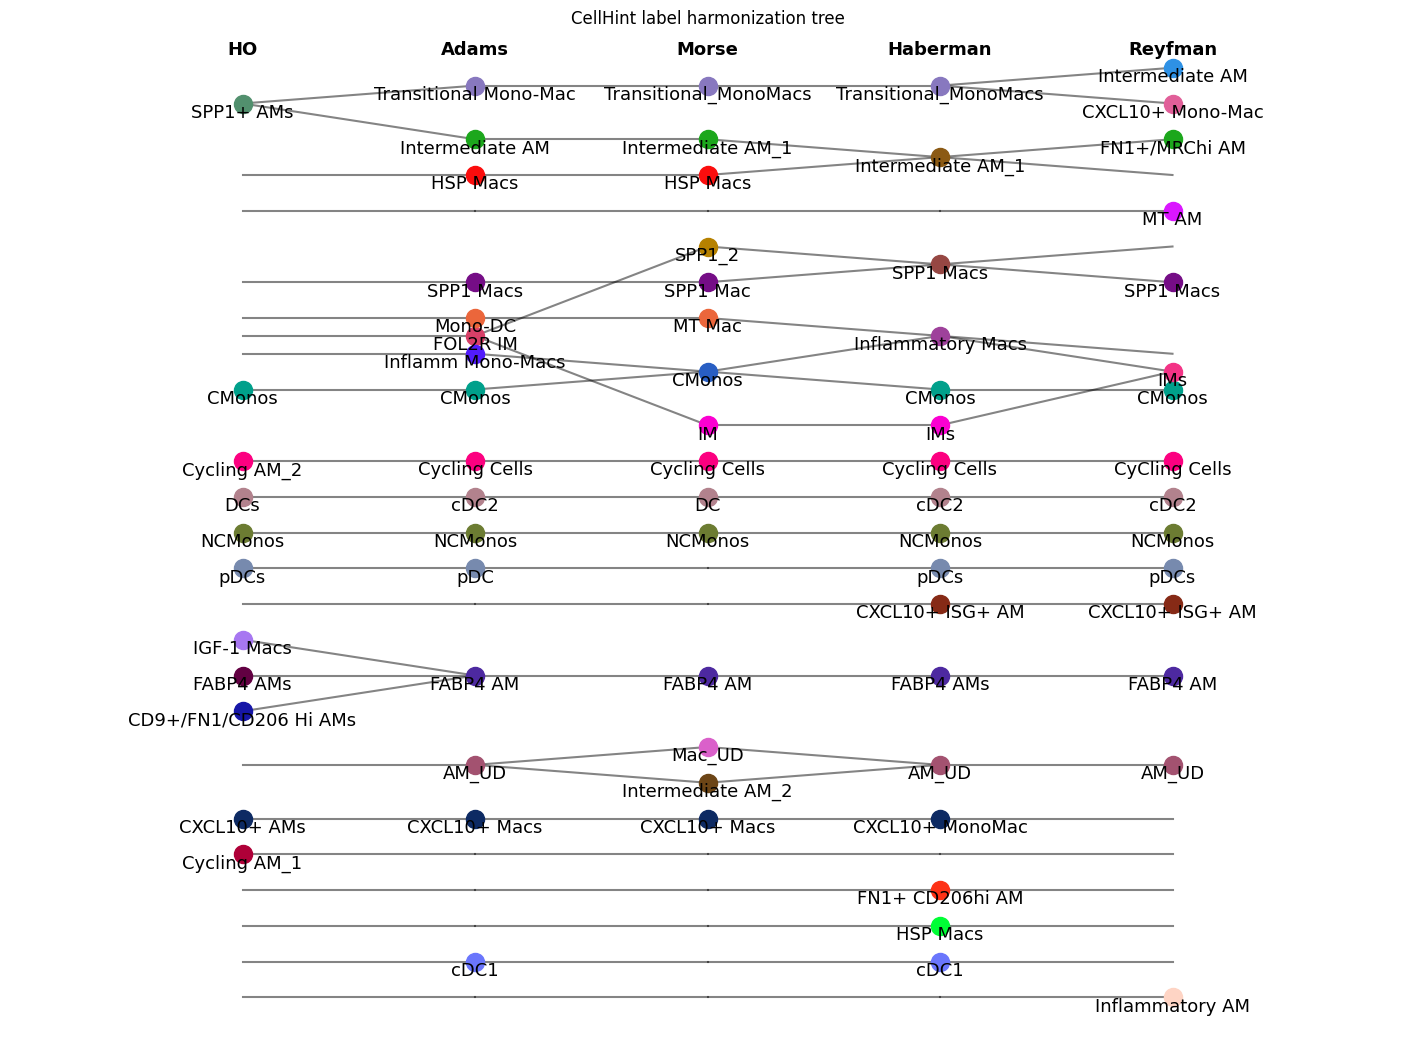

In [30]:
cellhint.treeplot(alignment,node_size="13",label_size="13",figsize=(18,13),save="/ceph/project/holab/jwoo/IPF_HT/Integration/Adam_Haberman_Reyfman_HO_Integration/Adams_Haberman_Reyfman_HO_Morse_Integration/CommonGenes/CellHint_TreeFigure.pdf")

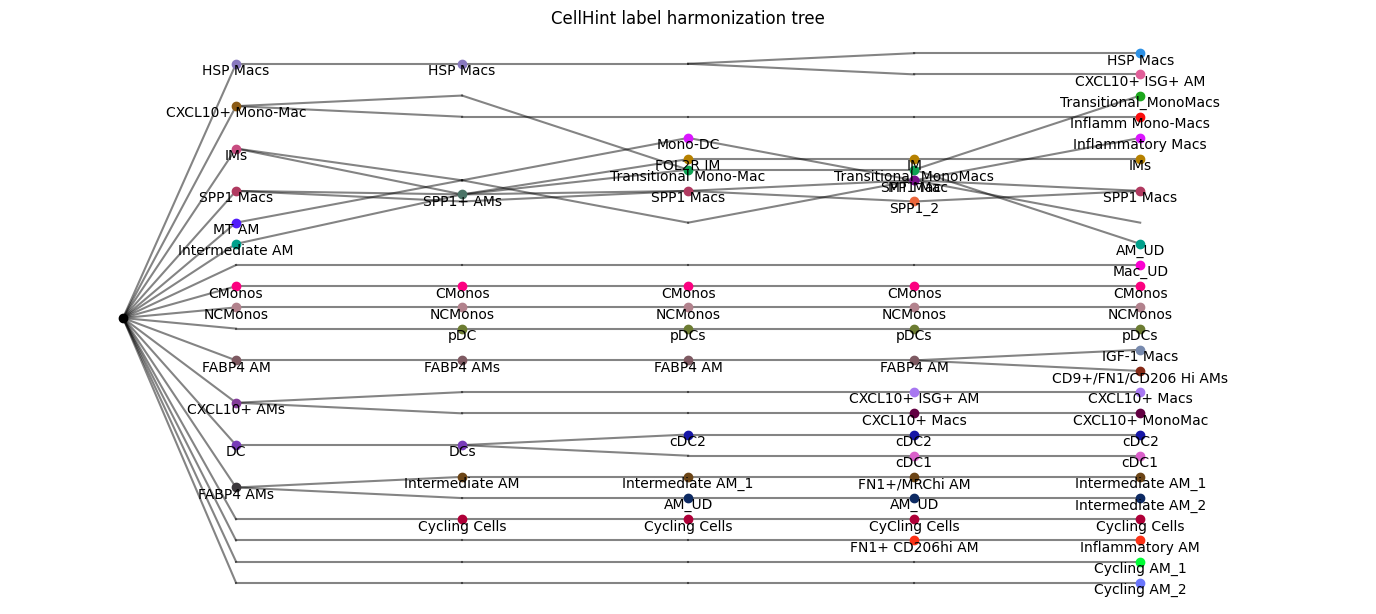

In [42]:
cellhint.treeplot(alignment,order_dataset = True)

In [43]:
member_mat = alignment.base_distance.to_meta(turn_binary = True)
member_mat.iloc[:5, :5]

,Adams: AM_UD,Adams: CMonos,Adams: CXCL10+ Macs,Adams: Cycling Cells,Adams: FABP4 AM
Adams: AM_UD,0.780045,0.000000,0.009297,0.002664,0.084147
Adams: CMonos,0.000000,0.840180,0.010204,0.000000,0.000472
Adams: CXCL10+ Macs,0.009297,0.010204,0.632653,0.000000,0.024027
Adams: Cycling Cells,0.002664,0.000000,0.000000,0.770870,0.046181
Adams: FABP4 AM,0.084147,0.000472,0.024027,0.046181,0.860604


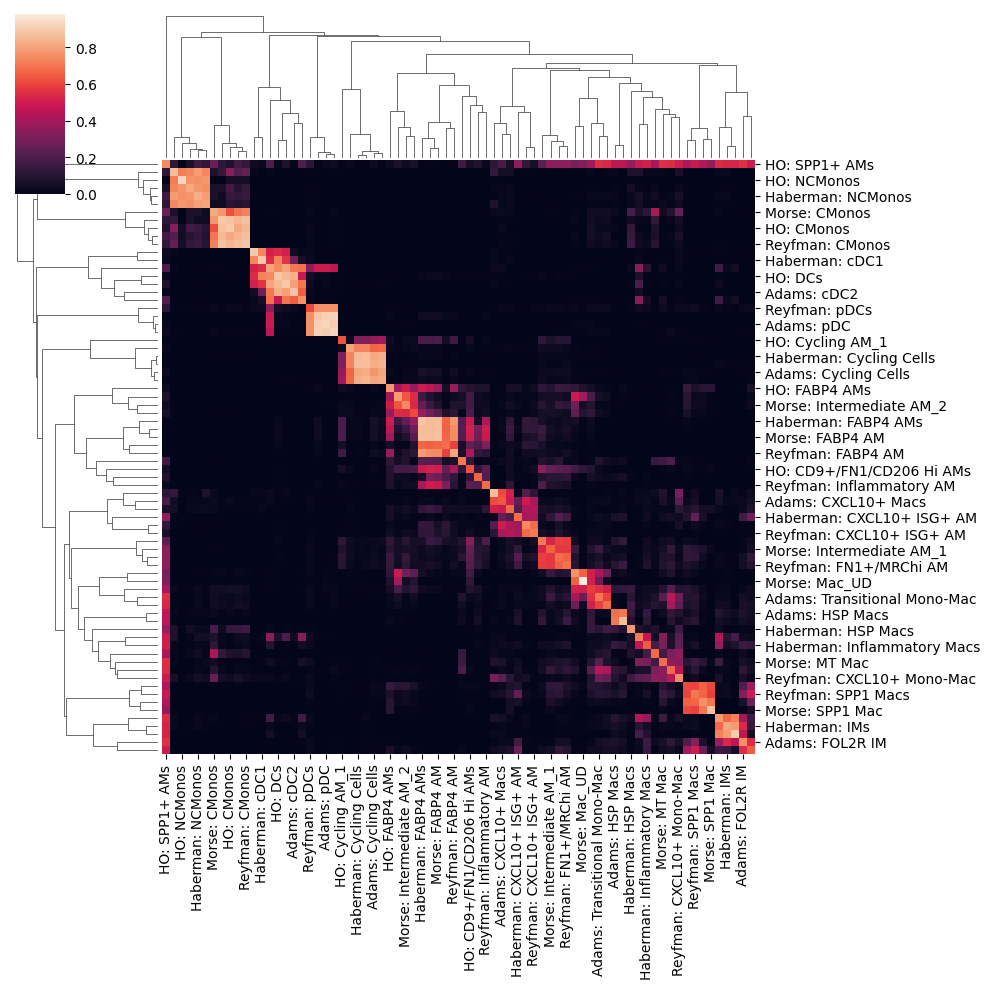

In [44]:
import seaborn as sns

sns.clustermap(member_mat)

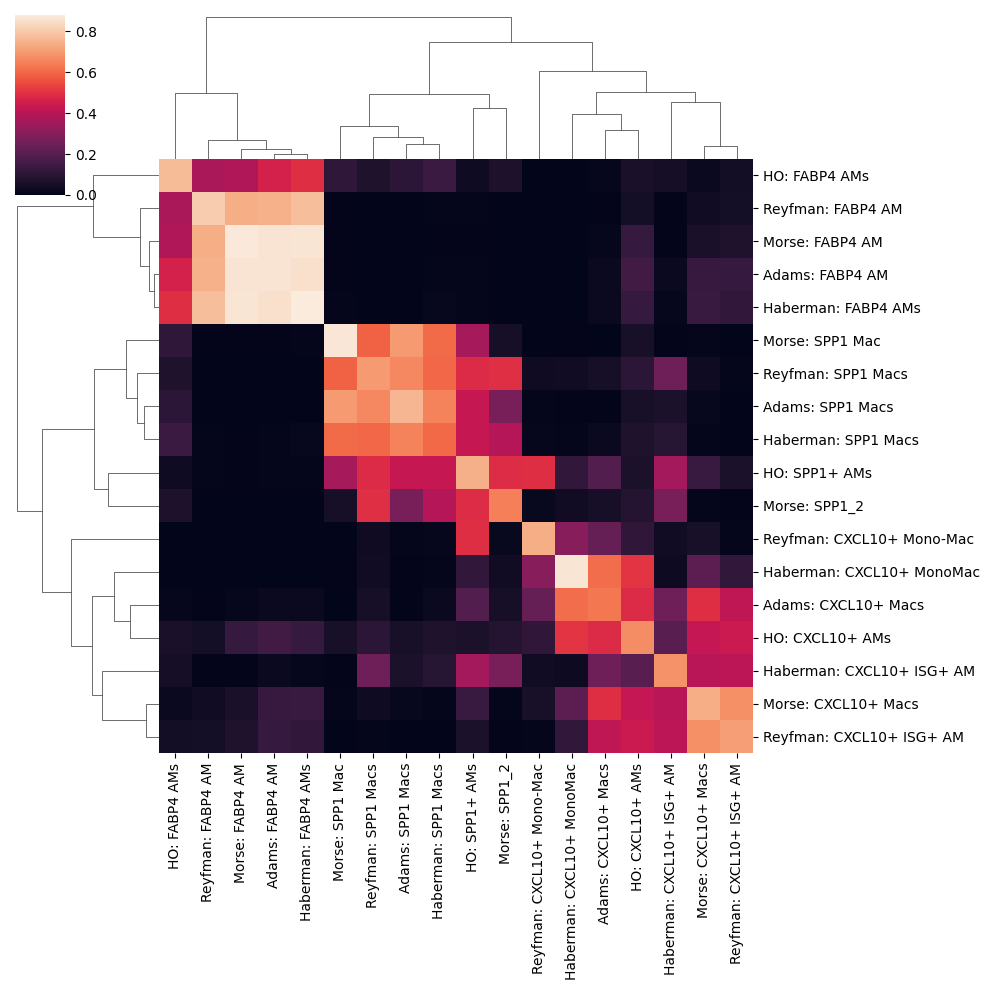

In [48]:
flag = member_mat.index.str.contains('CXCL10|SPP1|FABP4')
sns.clustermap(member_mat.loc[flag,flag])



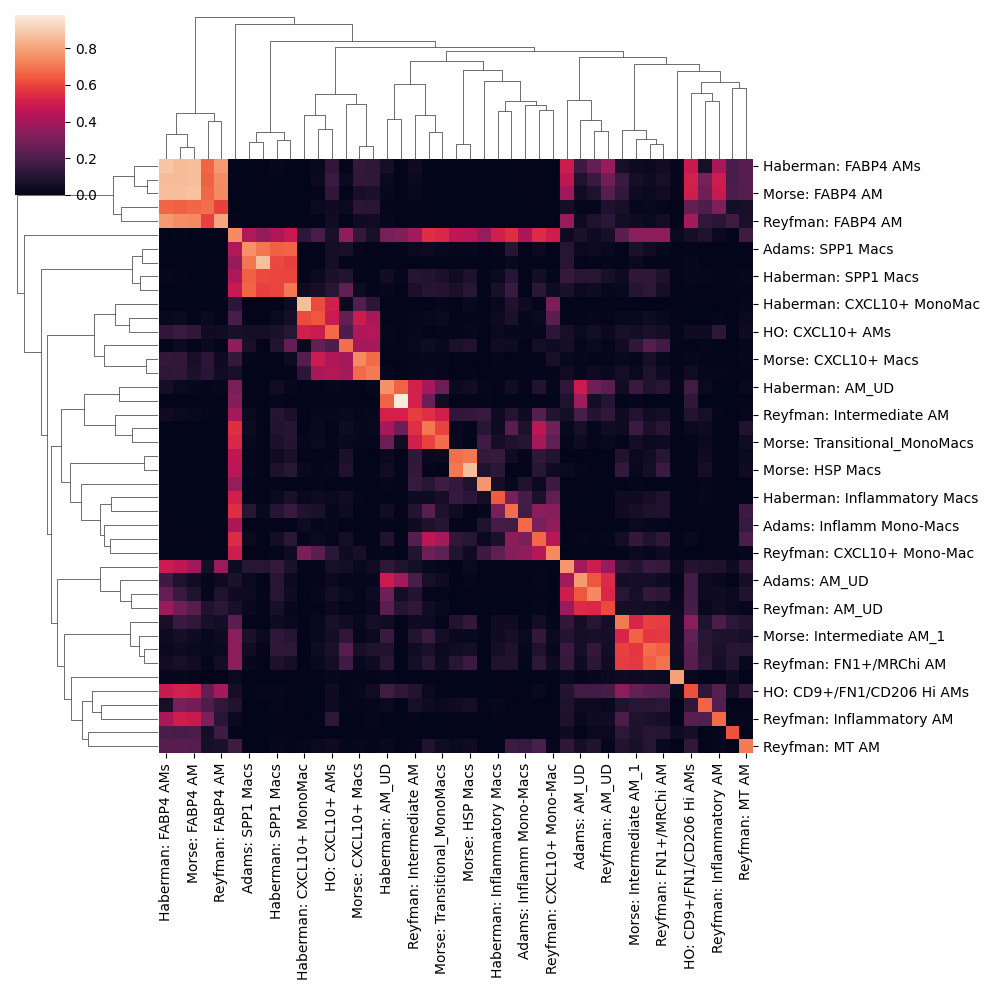

In [49]:
flag = member_mat.index.str.contains('AM|Mac')
sns.clustermap(member_mat.loc[flag,flag])

In [38]:
alignment.base_distance

Cross-dataset distance matrix between 74312 cells and 74 cell types from 5 datasets
    dist_mat: distance matrix between 74312 cells and 74 cell types
    cell: cell meta-information ('dataset', 'ID', 'cell_type')
    cell_type: cell type meta-information ('dataset', 'cell_type')
    assignment: data frame of cross-dataset cell type assignment

In [39]:
alignment.base_distance.assignment

,Adams,HO,Haberman,Morse,Reyfman
0,FABP4 AM,FABP4 AMs,FABP4 AMs,FABP4 AM,Inflammatory AM
1,Mono-DC,NCMonos,cDC2,DC,NCMonos
2,Cycling Cells,NCMonos,Cycling Cells,NCMonos,NCMonos
3,Intermediate AM,FABP4 AMs,AM_UD,Intermediate AM_2,MT AM
4,CMonos,CMonos,AM_UD,Mac_UD,CMonos
...,...,...,...,...,...
74307,CMonos,CMonos,CMonos,NCMonos,CMonos
74308,Cycling Cells,Cycling AM_1,Cycling Cells,Transitional_MonoMacs,CyCling Cells
74309,SPP1 Macs,SPP1+ AMs,SPP1 Macs,SPP1_2,SPP1 Macs
74310,FOL2R IM,SPP1+ AMs,IMs,SPP1_2,IMs


In [50]:
alignment.best_align(dataset_order = ['HO', 'Adams', 'Morse', 'Haberman', 'Reyfman'])

🖇 Harmonizing cell types of HO and Adams
🖇 Harmonizing cell types of Morse
🖇 Harmonizing cell types of Haberman
🖇 Harmonizing cell types of Reyfman


In [51]:
alignment.relation.head(10)

,HO,relation,Adams,relation,Morse,relation,Haberman,relation,Reyfman
0,NONE,=,HSP Macs,=,HSP Macs,∈,Intermediate AM_1,=,NONE
0,NONE,=,NONE,=,NONE,=,NONE,=,MT AM
0,CMonos,=,CMonos,∈,CMonos,=,CMonos,=,CMonos
1,Cycling AM_2,=,Cycling Cells,=,Cycling Cells,=,Cycling Cells,=,CyCling Cells
2,DCs,=,cDC2,=,DC,=,cDC2,=,cDC2
3,NCMonos,=,NCMonos,=,NCMonos,=,NCMonos,=,NCMonos
4,SPP1+ AMs,∋,Intermediate AM,=,Intermediate AM_1,∈,Intermediate AM_1,=,FN1+/MRChi AM
5,UNRESOLVED,=,SPP1 Macs,=,SPP1 Mac,∈,SPP1 Macs,=,SPP1 Macs
6,pDCs,=,pDC,=,UNRESOLVED,=,pDCs,=,pDCs
0,UNRESOLVED,=,UNRESOLVED,=,UNRESOLVED,=,CXCL10+ ISG+ AM,=,CXCL10+ ISG+ AM


In [52]:
alignment.reannotate()

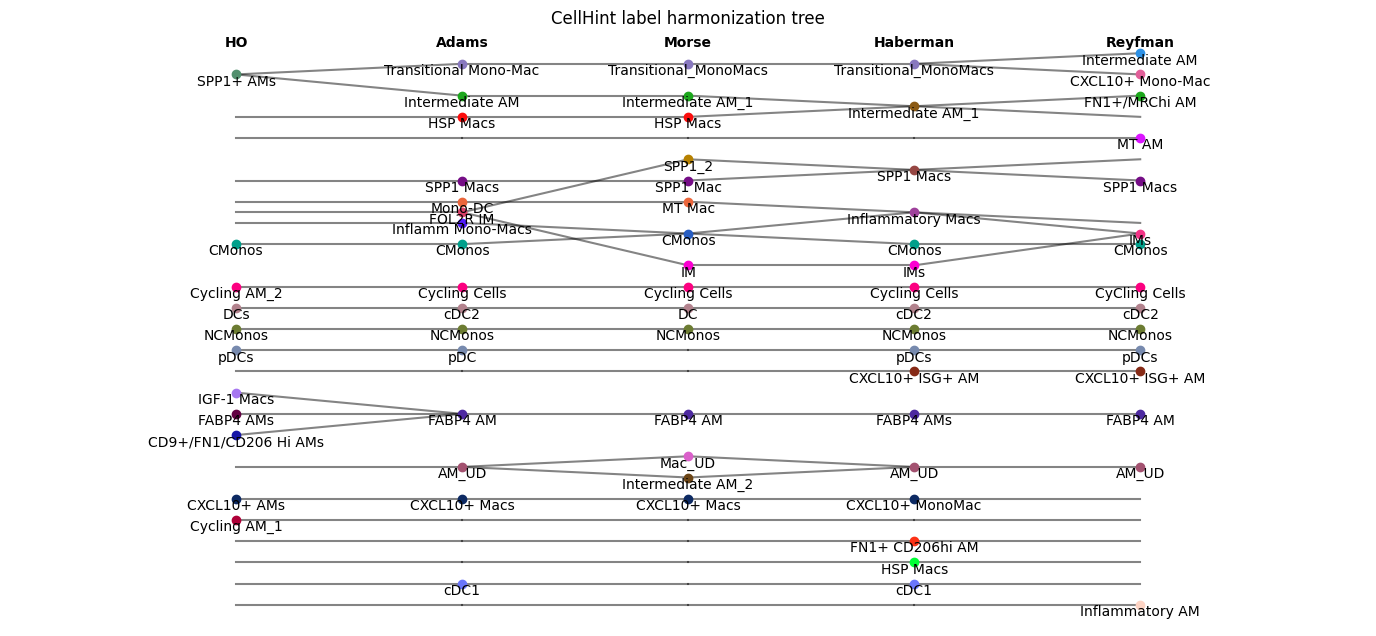

In [53]:
cellhint.treeplot(alignment)

In [54]:
member_mat = alignment.base_distance.to_meta(turn_binary = True)
member_mat.iloc[:5, :5]

,Adams: AM_UD,Adams: CMonos,Adams: CXCL10+ Macs,Adams: Cycling Cells,Adams: FABP4 AM
Adams: AM_UD,0.780045,0.000000,0.009297,0.002664,0.084147
Adams: CMonos,0.000000,0.840180,0.010204,0.000000,0.000472
Adams: CXCL10+ Macs,0.009297,0.010204,0.632653,0.000000,0.024027
Adams: Cycling Cells,0.002664,0.000000,0.000000,0.770870,0.046181
Adams: FABP4 AM,0.084147,0.000472,0.024027,0.046181,0.860604


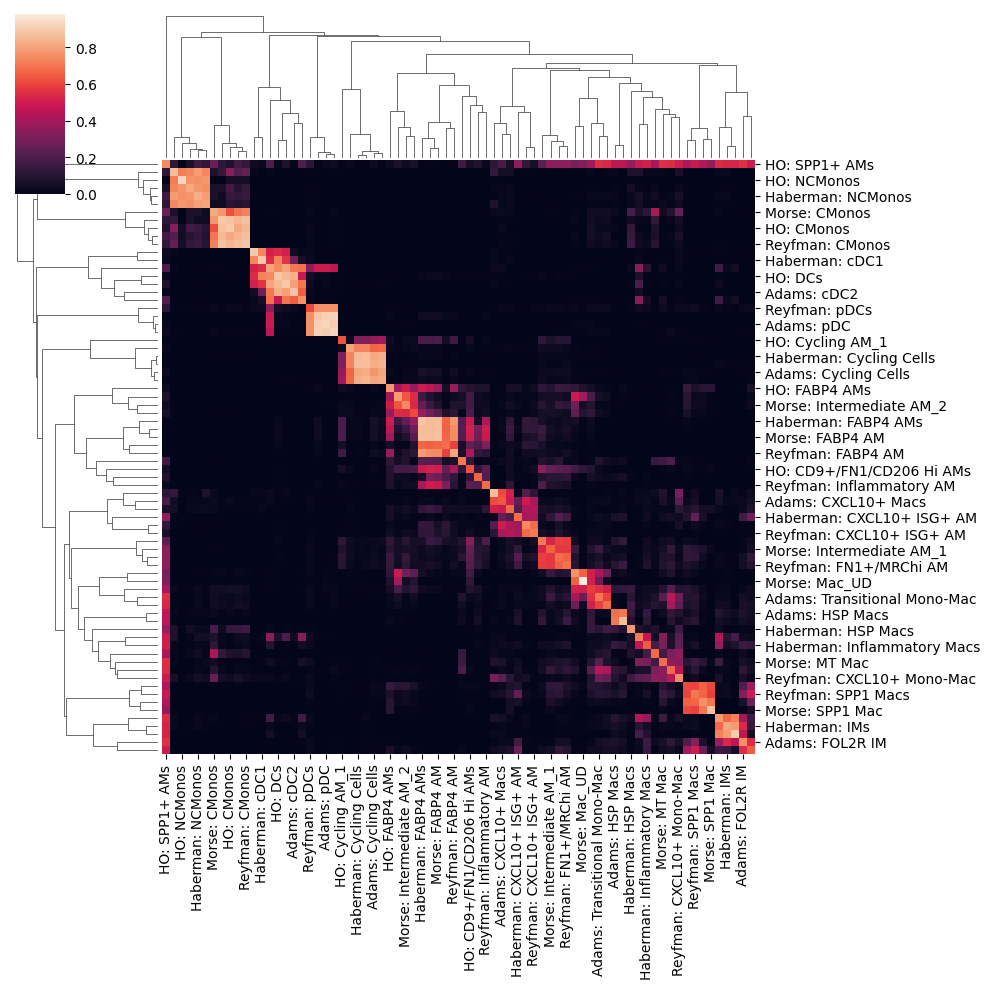

In [55]:
import seaborn as sns

sns.clustermap(member_mat)

In [56]:
dist_mat = alignment.base_distance.to_meta()
dist_mat.iloc[:5, :5]

,Adams: AM_UD,Adams: CMonos,Adams: CXCL10+ Macs,Adams: Cycling Cells,Adams: FABP4 AM
Adams: AM_UD,0.056472,0.524288,0.383477,0.829673,0.126297
Adams: CMonos,0.524288,0.075900,0.501756,0.905041,0.672459
Adams: CXCL10+ Macs,0.383477,0.501756,0.218769,0.863811,0.452192
Adams: Cycling Cells,0.829673,0.905041,0.863811,0.593819,0.824071
Adams: FABP4 AM,0.126297,0.672459,0.452192,0.824071,0.053839


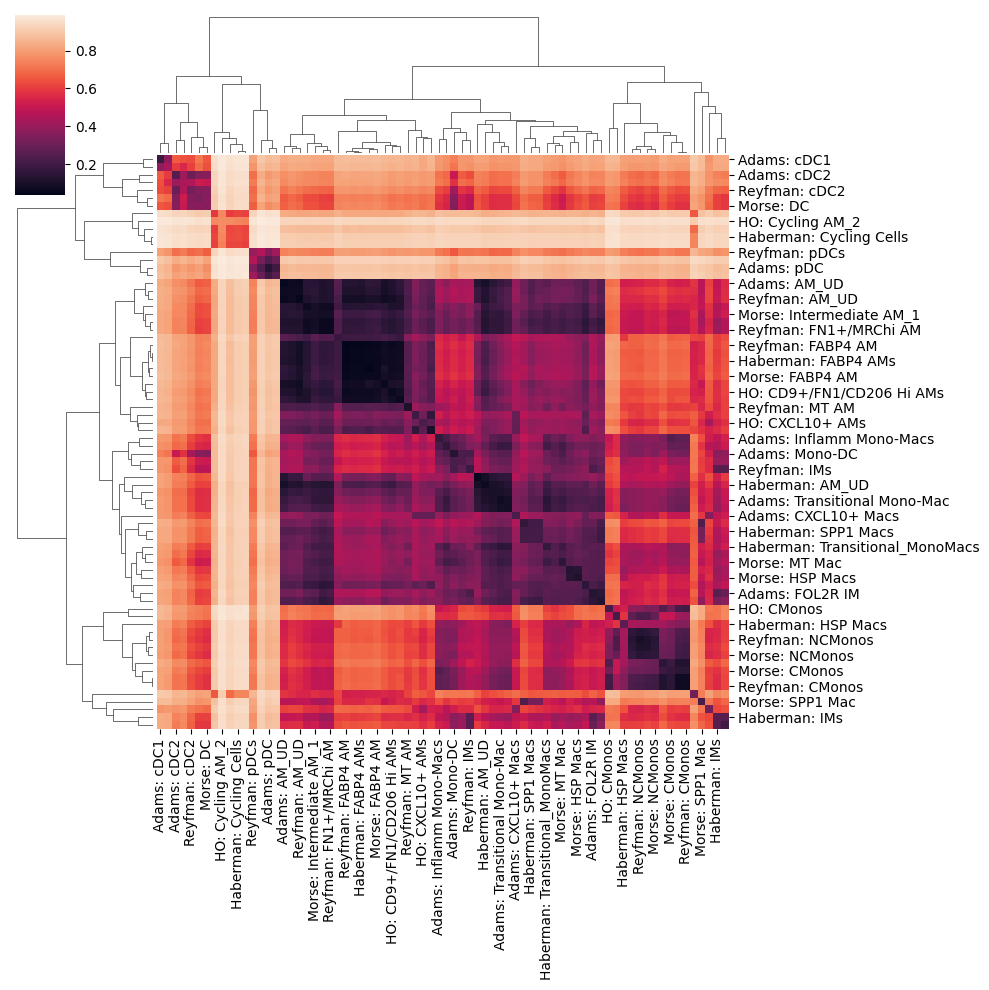

In [57]:

sns.clustermap(dist_mat)